In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def extract_prefix(input_string):
    return input_string.replace('_run_mean.csv', '')

In [4]:
def compute_rolling_statistics(df, window_size):
    '''
        Compute rolling statistics
    '''
    df['Rolling average'] = df['Mean-Value'].rolling(window=window_size).mean()
    df['Rolling std'] = df['Mean-Value'].rolling(window=window_size).std()
    return df


def plot_rolling_statistics(dfs, window_size, data_type, colours=None):
    '''
    Plot rolling averages and standard deviations

    Args:
    - dfs: List of DataFrames containing 'Step', 'Mean-Value', and 'Source' columns
    - window_size: Size of the rolling window
    - colors: List of hex color codes for each DataFrame plot

    '''
    plt.figure(figsize=(14, 8))

    if colours is None:
        colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    labels = [extract_prefix(df['Source'].iloc[0]) for df in dfs]

    for i, df in enumerate(dfs):
        # Compute rolling statistics
        df_stats = compute_rolling_statistics(df, window_size)

        # Get colour and label for this series
        colour = colours[i % len(colours)]  # Wrap around colors list
        label = labels[i % len(labels)]  # Wrap around labels list

        # Plot rolling average
        plt.plot(df_stats['Step'], df_stats['Rolling average'], color=colour, label=f'{label} rolling average {data_type}')

        # Plot rolling standard deviation as filled area
        plt.fill_between(df_stats['Step'],
                         df_stats['Rolling average'] - df_stats['Rolling std'],
                         df_stats['Rolling average'] + df_stats['Rolling std'],
                         alpha=0.2, color=colour, label=f"{label} ±1 std")

    plt.xlabel('Step')
    plt.ylabel(f'Rolling average {data_type}')
    plt.title(f'Rolling average {data_type} per model')
    plt.legend()
    plt.show()

In [5]:
from google.colab import files
uploaded = files.upload()

Saving rnd_run_mean.csv to rnd_run_mean.csv
Saving drnd_run_mean.csv to drnd_run_mean.csv


In [6]:
def handle_uploads(uploads, data_type='return'):
    '''
        Handle uploaded files and plot rolling statistics
    '''
    dfs = []
    for name, file in uploads.items():
        df = pd.read_csv(name)
        df['Source'] = name  # Add a source column to identify each dataset
        dfs.append(df)

    colours = ['#ed1e79', '#8cc63f', '#f7931e', '#29abe2']
    plot_rolling_statistics(dfs, 100, data_type, colours)

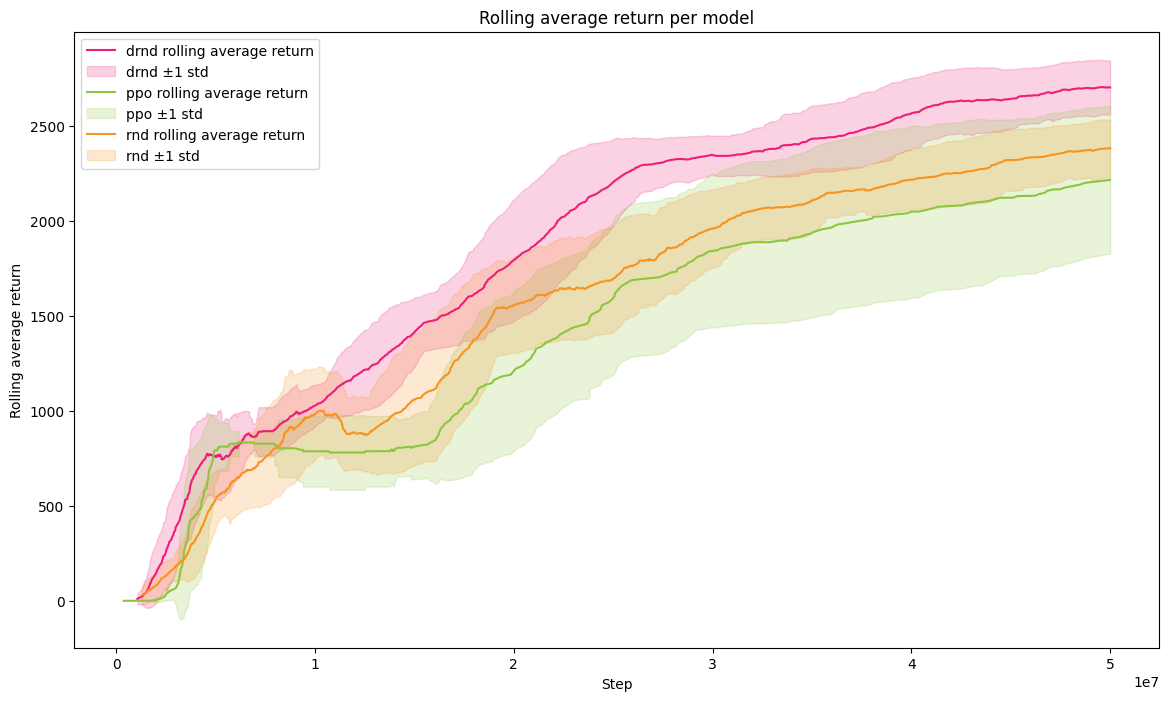

In [ ]:
handle_uploads(uploaded)

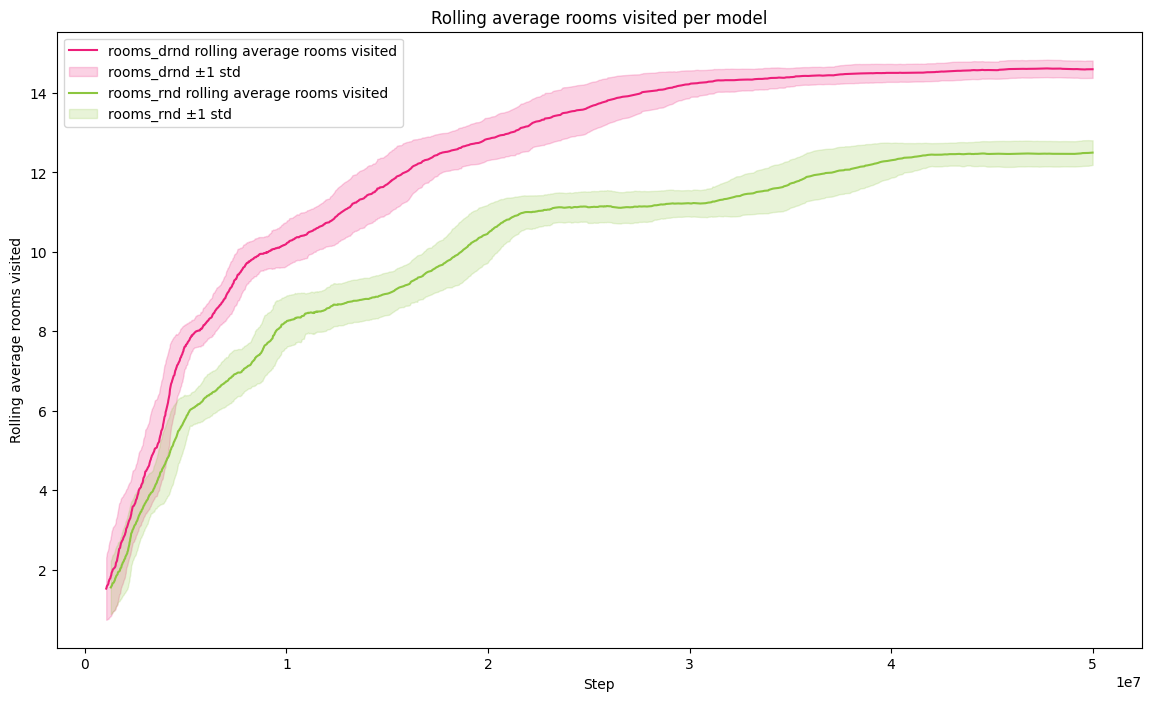

In [ ]:
handle_uploads(uploaded, data_type='rooms visited')

# For Venture (only one run each)

In [7]:
def plot_rolling_statistics_venture(dfs, window_size, colors=None):
    '''
    Plot rolling averages and standard deviations

    Args:
    - dfs: List of DataFrames containing 'Step', 'Mean-Value', and 'Source' columns
    - window_size: Size of the rolling window
    - colors: List of hex color codes for each DataFrame plot

    '''
    plt.figure(figsize=(14, 8))

    if colors is None:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    labels = [extract_prefix(df['Source'].iloc[0]) for df in dfs]

    for i, df in enumerate(dfs):
        # Compute rolling statistics
        df_stats = compute_rolling_statistics(df, window_size)

        # Get color and label for this series
        color = colors[i % len(colors)]  # Wrap around colors list
        label = labels[i % len(labels)]  # Wrap around labels list

        # Plot rolling average
        plt.plot(df_stats['Step'], df_stats['Rolling average'], color=color, label=f"{label} rolling average return")

        # Plot rolling standard deviation as filled area
        # plt.fill_between(df_stats['Step'],
        #                  df_stats['Rolling average'] - df_stats['Rolling std'],
        #                  df_stats['Rolling average'] + df_stats['Rolling std'],
        #                  alpha=0.2, color=color, label=f"{label} ±1 std")

    plt.xlabel('Step')
    plt.ylabel('Rolling average return')
    plt.title('Rolling average return per model')
    plt.legend()
    plt.show()

def handle_venture(uploads):
    '''
        Handle uploaded files and plot rolling statistics
    '''
    dfs = []
    for name, file in uploads.items():
        df = pd.read_csv(name)
        df['Source'] = name  # Add a source column to identify each dataset
        dfs.append(df)

    colours = ['#ed1e79', '#8cc63f', '#f7931e', '#29abe2']
    # plot_rolling_statistics_venture(dfs, 100, colours)
    plot_rolling_statistics(dfs, 100, colours)

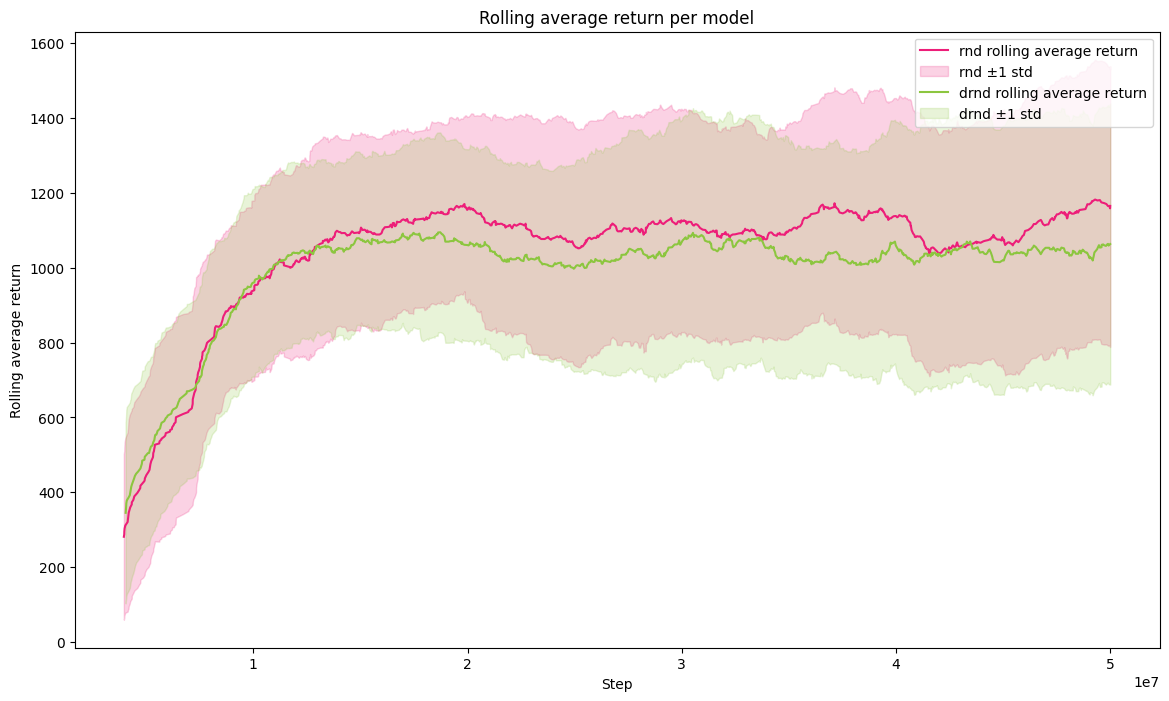

In [8]:
handle_uploads(uploaded)